In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
img = Image.open('assets/image.png')

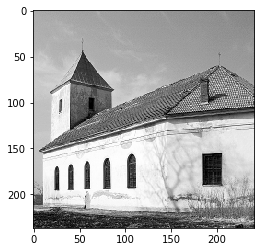

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
# convert image into a numpy array
img = np.asarray(img)

In [5]:
def gaussian_kernel(size, size_y=None):
    """
    A Gaussian kernel that should be applied to an image for a blurring effect.
    """
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()

In [6]:
kernel = gaussian_kernel(5)

In [7]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m != n):
        raise Exception('Kernel shape should be a square')
        
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

In [8]:
blurred_img = convolution2d(img, kernel)

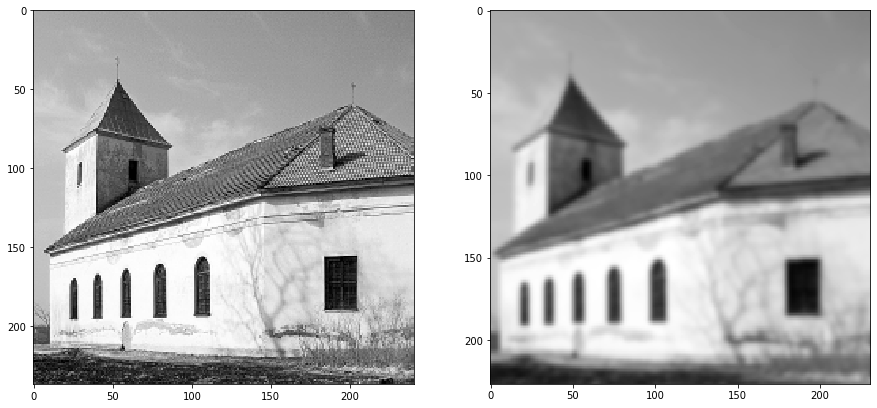

In [9]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(blurred_img, cmap='gray')

plt.show(block=True)